IMPORTING PROCESSING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
#pip install -U imbalanced-learn

IMPORTING MODELS

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
from imblearn import under_sampling

IMPORTING METRICS

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

READING DATA

In [7]:
df_delay=pd.read_csv("Merged_weather_flight.csv",index_col=0)

In [8]:
df_delay.head()

,windspeedKmph,windspeedMiles,WindGustKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,...,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
0,18,11,28,315,122,0.0,10,1024,100,38,...,0,600,700,6,10397,13204,700,0,8,1
1,18,11,28,315,122,0.0,10,1024,100,38,...,0,600,800,1,10397,14100,800,0,0,1
2,18,11,26,317,122,0.0,10,1024,100,38,...,0,700,1000,0,10397,14747,900,0,0,1
3,18,11,26,317,122,0.0,10,1024,100,38,...,0,700,900,0,10397,13303,900,0,1,1
4,18,11,26,317,122,0.0,10,1024,100,38,...,0,700,900,10,10397,14771,900,0,3,1


EDA

In [9]:
df_delay.columns

Index(['windspeedKmph', 'windspeedMiles', 'WindGustKmph', 'winddirDegree',
       'weatherCode', 'precipMM', 'visibility', 'pressure', 'cloudcover',
       'DewPointF', 'tempF', 'WindChillF', 'humidity', 'time', 'date',
       'airport', 'Origin', 'Dest', 'FlightDate', 'DepTime', 'DepDel15',
       'CRSDepTime', 'CRSArrTime', 'DepDelayMinutes', 'OriginAirportID',
       'DestAirportID', 'ArrTime', 'ArrDel15', 'ArrDelayMinutes', 'Month'],
      dtype='object')

In [10]:
drop_cols=["windspeedMiles","OriginAirportID","DestAirportID","CRSArrTime","ArrTime","ArrDelayMinutes","date","time","airport"]

In [11]:
df_delay.drop(labels=drop_cols,axis=1,inplace=True)

In [12]:
df_delay.shape

(1048575, 21)

In [13]:
plot_data=(df_delay.groupby(by="ArrDel15")["ArrDel15"].count()/df_delay.shape[0])*100

In [14]:
plot_data=pd.DataFrame(plot_data)

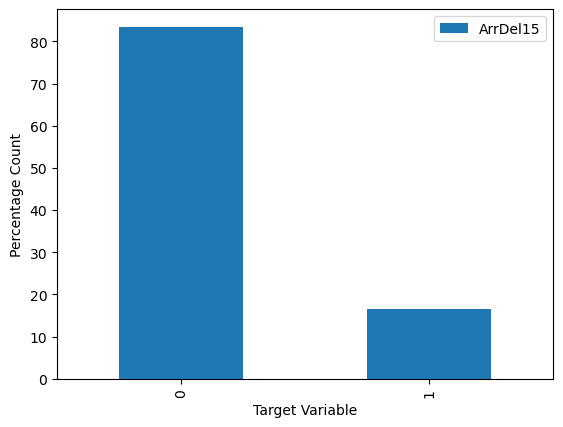

In [15]:
plot_data.plot(kind="bar")
plt.xlabel("Target Variable")
plt.ylabel("Percentage Count")
plt.show()

FEATURE SELECTION

In [16]:
predictors=['WindGustKmph', 'winddirDegree', 'weatherCode',
       'precipMM', 'visibility', 'pressure', 'cloudcover',
       'tempF', 'WindChillF', 'humidity', 'Origin', 'Dest',
       'DepTime', 'DepDel15', 'DepDelayMinutes',
       'Month']

target=["ArrDel15"]

In [17]:
X=df_delay[predictors]
Y=df_delay[target]

In [18]:
encoder=LabelEncoder()
X["Origin"]=encoder.fit_transform(X["Origin"])
X["Dest"]=encoder.fit_transform(X["Dest"])

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_80123/3705347271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Origin"]=encoder.fit_transform(X["Origin"])
/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_80123/3705347271.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Dest"]=encoder.fit_transform(X["Dest"])


In [19]:
X

,WindGustKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,tempF,WindChillF,humidity,Origin,Dest,DepTime,DepDel15,DepDelayMinutes,Month
0,28,315,122,0.0,10,1024,100,40,32,93,0,120,600,0,6,1
1,28,315,122,0.0,10,1024,100,40,32,93,0,153,600,0,1,1
2,26,317,122,0.0,10,1024,100,41,33,93,0,179,700,0,0,1
3,26,317,122,0.0,10,1024,100,41,33,93,0,127,700,0,0,1
4,26,317,122,0.0,10,1024,100,41,33,93,0,180,700,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,15,215,143,0.0,5,1009,16,37,33,95,2,110,1700,1,17,1
1048571,15,215,143,0.0,5,1009,16,37,33,95,2,109,1700,0,2,1
1048572,15,215,143,0.0,5,1009,16,37,33,95,2,52,1700,0,0,1
1048573,15,215,143,0.0,5,1009,16,37,33,95,2,151,1700,0,9,1


RANDOM UNDER SAMPLING

In [20]:
RUS = under_sampling.RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_, Y_ = RUS.fit_resample(X, Y)

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y_,random_state=21,test_size=0.2)

DICT TO DATAFRAME CONVERTER

In [22]:
def report_converter(report,method):
    x=report['0']
    y=report['1']
    acc=report['accuracy']
    class_0_precision=x['precision']
    class_0_recall=x['recall']
    class_0_F1_score=x['f1-score']
    class_1_precision=y['precision']
    class_1_recall=y['recall']
    class_1_F1_score=y['f1-score']
    
    columns=['Method','Accuracy','Class_0_Precision','Class_0_Recall','Class_0_F1_score','Class_1_Precision','Class_1_Recall','Class_1_F1_score']
    values=[method,acc,class_0_precision,class_0_recall,class_0_F1_score,class_1_precision,class_1_recall,class_1_F1_score]
    
    report_df=pd.DataFrame(columns=columns)
    report_df.loc[0]=values
    
    return report_df

Logistic Regression

In [23]:
model = LogisticRegression(solver='liblinear',random_state=21)

In [24]:
model.fit(X_train,Y_train)

/Users/omii/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=21, solver='liblinear')

In [25]:
logistic_predictions=model.predict(X_test)

In [26]:
report2=(classification_report(Y_test,model.predict(X_test),output_dict=True))
report2=report_converter(report2,"Logistic-Regression")

In [27]:
report2

,Method,Accuracy,Class_0_Precision,Class_0_Recall,Class_0_F1_score,Class_1_Precision,Class_1_Recall,Class_1_F1_score
0,Logistic-Regression,0.878222,0.844488,0.926005,0.88337,0.918809,0.830813,0.872598


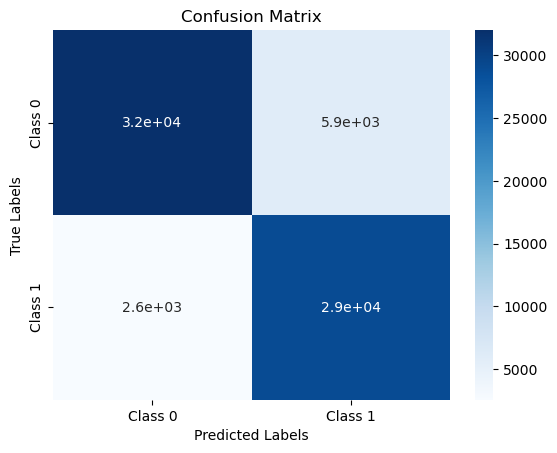

In [28]:
from sklearn.metrics import confusion_matrix



# Compute confusion matrix
cm = confusion_matrix(logistic_predictions, Y_test)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


Decision Tree Classifier

In [29]:
model = DecisionTreeClassifier(criterion = "gini",random_state = 21)

In [30]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=21)

In [31]:
tree_predictions=model.predict(X_test)

In [32]:
report3=(classification_report(Y_test,model.predict(X_test),output_dict=True))
report3=report_converter(report3,"DecisionTreeClassifier")

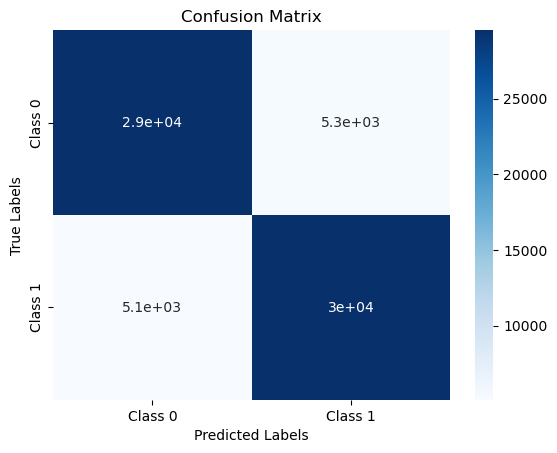

In [33]:
from sklearn.metrics import confusion_matrix



# Compute confusion matrix
cm = confusion_matrix(tree_predictions, Y_test)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [34]:
report3

,Method,Accuracy,Class_0_Precision,Class_0_Recall,Class_0_F1_score,Class_1_Precision,Class_1_Recall,Class_1_F1_score
0,DecisionTreeClassifier,0.8501,0.847328,0.852647,0.849979,0.852885,0.847573,0.850221


RANDOM FORESTS

In [35]:
# Creating a random forest classifier object
rfc = RandomForestClassifier(n_estimators=30, random_state=21)

In [36]:
# Fitting the model to the training data
rfc.fit(X_train, Y_train)

/var/folders/77/l0m4syw9301bj1fcnkqk75fr0000gn/T/ipykernel_80123/1175322403.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=30, random_state=21)

In [37]:
# Predicting on the test data
random_forest_predictions = rfc.predict(X_test)

In [38]:
# get feature importances
importances = rfc.feature_importances_

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]



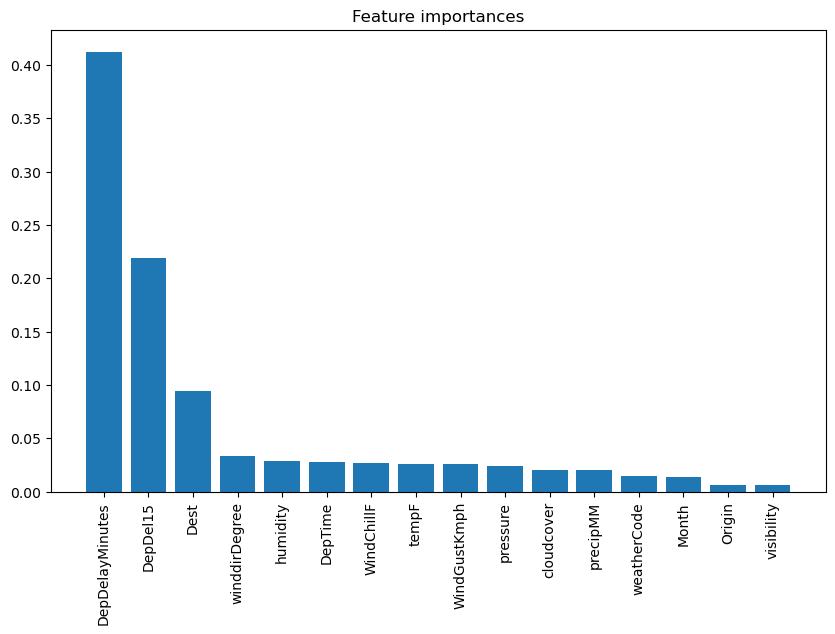

In [39]:
# plot the feature importances
plt.figure(figsize=(10,6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()

In [40]:
# Printing the accuracy score
report4=(classification_report(Y_test,model.predict(X_test),output_dict=True))
report4=report_converter(report4,"Random-Forest-Classifier")

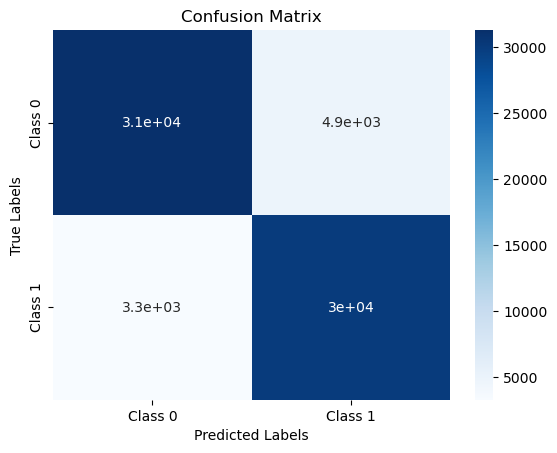

In [41]:
from sklearn.metrics import confusion_matrix



# Compute confusion matrix
cm = confusion_matrix(random_forest_predictions, Y_test)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [42]:
report4

,Method,Accuracy,Class_0_Precision,Class_0_Recall,Class_0_F1_score,Class_1_Precision,Class_1_Recall,Class_1_F1_score
0,Random-Forest-Classifier,0.8501,0.847328,0.852647,0.849979,0.852885,0.847573,0.850221


KNN

In [43]:
# Importing necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Creating KNN classifier object
k = 2  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Fitting the classifier to the training data
knn.fit(X_train, Y_train)

# Predicting labels for test data
KNN_predictions = knn.predict(X_test)

# Calculating accuracy of the classifier
report5=(classification_report(Y_test,knn.predict(X_test),output_dict=True))
report5=report_converter(report5,"KNN")


/Users/omii/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


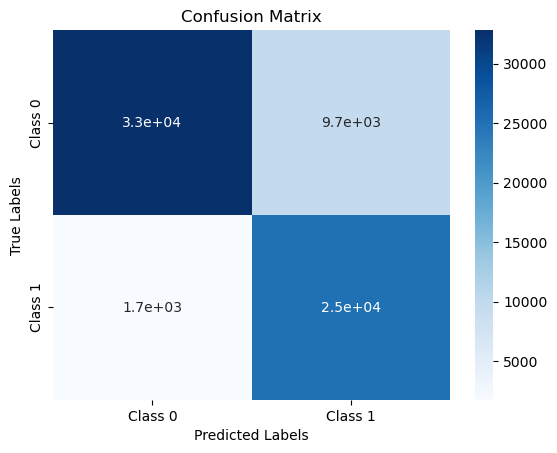

In [44]:
from sklearn.metrics import confusion_matrix



# Compute confusion matrix
cm = confusion_matrix(KNN_predictions, Y_test)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [45]:
report5

,Method,Accuracy,Class_0_Precision,Class_0_Recall,Class_0_F1_score,Class_1_Precision,Class_1_Recall,Class_1_F1_score
0,KNN,0.83444,0.771072,0.949465,0.85102,0.934923,0.720317,0.813708


NEURAL NET

In [46]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


# Creating neural network model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=16))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, Y_train, epochs=5, batch_size=2, verbose=1,validation_split=0.2)

# Predicting labels for test data
NN_predictions = model.predict(X_test)

2023-04-21 09:23:18.502231: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5


2023-04-21 09:23:20.695330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


111060/111060 [==============================] - 63s 561us/step - loss: 0.3479 - accuracy: 0.8697 - val_loss: 0.3118 - val_accuracy: 0.8799
Epoch 2/5
111060/111060 [==============================] - 62s 556us/step - loss: 0.3155 - accuracy: 0.8772 - val_loss: 0.3071 - val_accuracy: 0.8792
Epoch 3/5
111060/111060 [==============================] - 62s 558us/step - loss: 0.3138 - accuracy: 0.8772 - val_loss: 0.3060 - val_accuracy: 0.8802
Epoch 4/5
111060/111060 [==============================] - 62s 560us/step - loss: 0.3110 - accuracy: 0.8774 - val_loss: 0.3348 - val_accuracy: 0.8649
Epoch 5/5
2170/2170 [==============================] - 1s 272us/step


In [47]:
#Converting predicted labels to binary values (0 or 1)
NN_predictions = np.array([1 if x > 0.5 else 0 for x in NN_predictions])

In [48]:
# Calculating accuracy of the classifier
report6=(classification_report(Y_test,NN_predictions,output_dict=True))
report6=report_converter(report6,"Neural-Net")

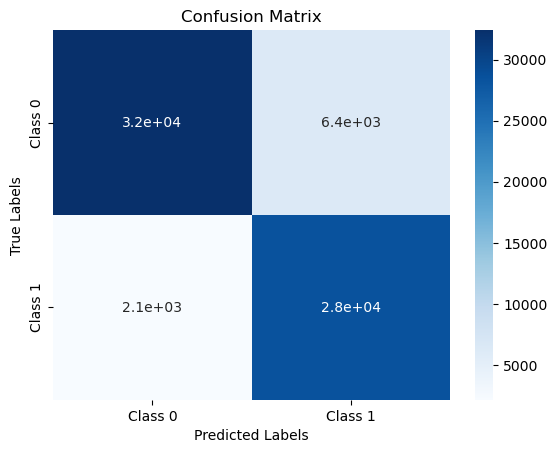

In [49]:
from sklearn.metrics import confusion_matrix



# Compute confusion matrix
cm = confusion_matrix(NN_predictions, Y_test)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [50]:
report6

,Method,Accuracy,Class_0_Precision,Class_0_Recall,Class_0_F1_score,Class_1_Precision,Class_1_Recall,Class_1_F1_score
0,Neural-Net,0.8773,0.835743,0.937981,0.883916,0.929967,0.817094,0.869884


SVM

In [72]:
# Importing necessary libraries
from sklearn.svm import SVC


# Creating SVM classifier object
svm = SVC(kernel='linear', C=1.0)

In [ ]:
# Fitting the classifier to the training data
svm.fit(X_train, Y_train)

/Users/omii/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predicting labels for test data
SVM_pred = svm.predict(X_test)

In [ ]:
# Calculating accuracy of the classifier
report7=(classification_report(Y_test,SVM_pred,output_dict=True))
report7=report_converter(report7,"SVM")

In [55]:
#report7

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#fit LDA model on training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)

# make predictions on test data
LDA_pred = lda.predict(X_test)

# evaluate accuracy of the model
report8=(classification_report(Y_test,LDA_pred,output_dict=True))
report8=report_converter(report8,"LDA")

/Users/omii/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


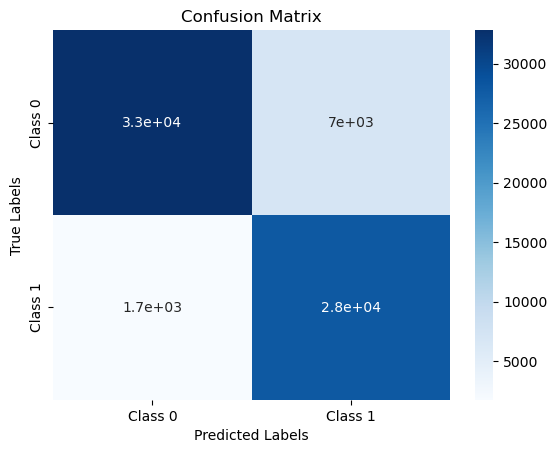

In [57]:
from sklearn.metrics import confusion_matrix



# Compute confusion matrix
cm = confusion_matrix(LDA_pred, Y_test)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Set labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [58]:
report8

,Method,Accuracy,Class_0_Precision,Class_0_Recall,Class_0_F1_score,Class_1_Precision,Class_1_Recall,Class_1_F1_score
0,LDA,0.874317,0.824584,0.949667,0.882717,0.941214,0.799558,0.864622


PLOTTING ROC CURVE

In [59]:
naive_predictions=np.zeros(shape=Y_test.shape)

In [60]:
naive_fpr, naive_tpr, _ = roc_curve(Y_test, naive_predictions)
logistic_fpr, logistic_tpr, _ = roc_curve(Y_test, logistic_predictions)
tree_fpr, tree_tpr, _ = roc_curve(Y_test, tree_predictions)
forest_fpr, forest_tpr, _ = roc_curve(Y_test, random_forest_predictions)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, KNN_predictions)
NN_fpr, NN_tpr, _ = roc_curve(Y_test, NN_predictions)
LDA_fpr,LDA_tpr, _ = roc_curve(Y_test, LDA_pred)

In [68]:
auc1=roc_auc_score(Y_test,naive_predictions)
auc2=roc_auc_score(Y_test,logistic_predictions)
auc3=roc_auc_score(Y_test,tree_predictions)
auc4=roc_auc_score(Y_test,random_forest_predictions)
auc5=roc_auc_score(Y_test,KNN_predictions)
auc6=roc_auc_score(Y_test,NN_predictions)
auc7=roc_auc_score(Y_test,LDA_pred)

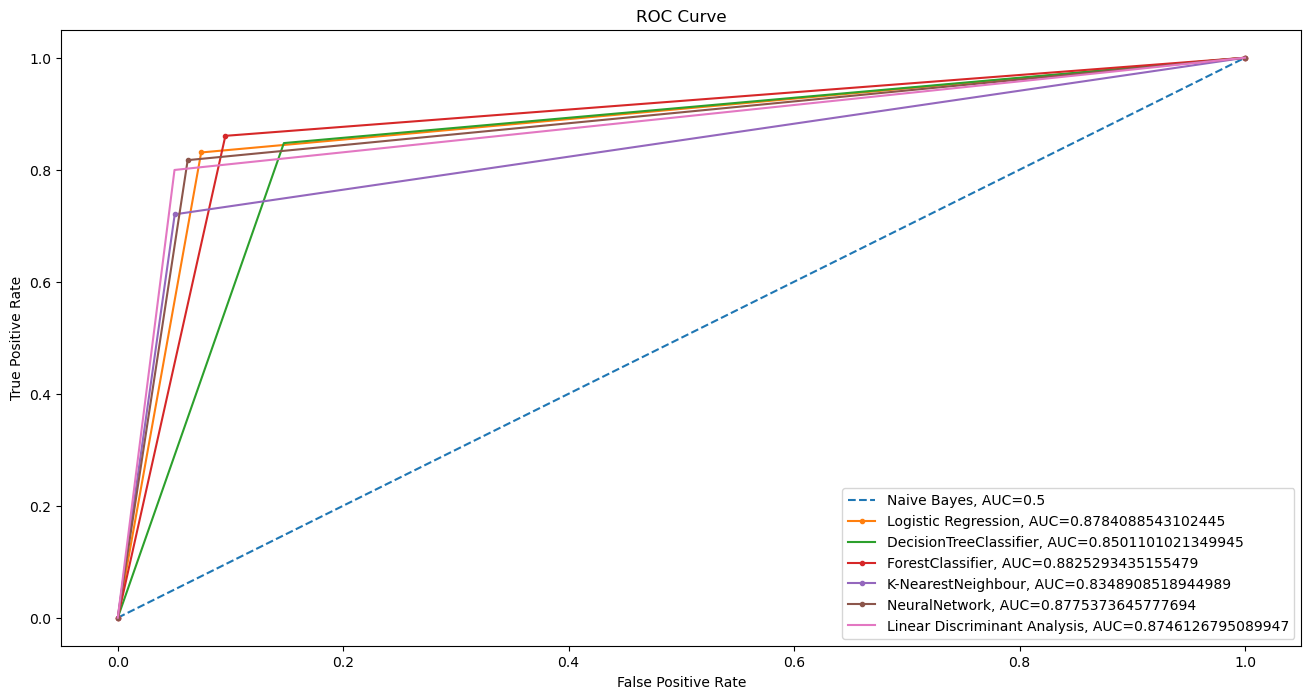

In [71]:
plt.figure(figsize=(16,8))
plt.plot(naive_fpr, naive_tpr, linestyle='--', label='Naive Bayes, AUC={}'.format(auc1))
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic Regression, AUC={}'.format(auc2))
plt.plot(tree_fpr,tree_tpr,label="DecisionTreeClassifier, AUC={}".format(auc3))
plt.plot(forest_fpr, forest_tpr, marker='.', label='ForestClassifier, AUC={}'.format(auc4))
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-NearestNeighbour, AUC={}'.format(auc5))
plt.plot(NN_fpr, NN_tpr, marker='.', label='NeuralNetwork, AUC={}'.format(auc6))
plt.plot(LDA_fpr,LDA_tpr,label="Linear Discriminant Analysis, AUC={}".format(auc7))
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [62]:
results=pd.concat([report2,report3,report4,report5,report6,report8])

In [63]:
results

,Method,Accuracy,Class_0_Precision,Class_0_Recall,Class_0_F1_score,Class_1_Precision,Class_1_Recall,Class_1_F1_score
0,Logistic-Regression,0.878222,0.844488,0.926005,0.883370,0.918809,0.830813,0.872598
0,DecisionTreeClassifier,0.850100,0.847328,0.852647,0.849979,0.852885,0.847573,0.850221
0,Random-Forest-Classifier,0.850100,0.847328,0.852647,0.849979,0.852885,0.847573,0.850221
0,KNN,0.834440,0.771072,0.949465,0.851020,0.934923,0.720317,0.813708
0,Neural-Net,0.877300,0.835743,0.937981,0.883916,0.929967,0.817094,0.869884
0,LDA,0.874317,0.824584,0.949667,0.882717,0.941214,0.799558,0.864622
